In [96]:
###Part 2 – Supervised learning

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, precision_recall_curve

In [98]:
## Load the processed dataset

In [99]:
df = pd.read_csv('CASchools_processed.csv')
# Select features and target
features = [
    'students', 'calworks', 'lunch', 'income', 'english',
    'student_teacher_ratio', 'disadvantage_index',
    'grades_encoded', 'county_encoded'
]

In [100]:
## Create ratio and split data 

In [101]:
# Create student-teacher ratio 
#if it doesn't exist
if 'student_teacher_ratio' not in df.columns:
    df['student_teacher_ratio'] = df['students'] / df['teachers']

# Create disadvantage index if it doesn't exist
if 'disadvantage_index' not in df.columns:
    df['disadvantage_index'] = (df['calworks'] + df['lunch'] + df['english']) / 3

X = df[features]
y = df['performance']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Check the distribution of classes in train and test sets
print("Training set class distribution:")
print(y_train.value_counts())
print("\nTest set class distribution:")
print(y_test.value_counts())

Training set class distribution:
performance
Medium    147
Low        74
High       73
Name: count, dtype: int64

Test set class distribution:
performance
Medium    63
High      32
Low       31
Name: count, dtype: int64


In [102]:
## Standardize the features

In [103]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [104]:
## Function to evaluate model

In [105]:
def evaluate_model(model, x_train, y_train, X_test, y_test, model_name):
    # Train the model
    model.fit(x_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    print(f"\n{model_name} Results:")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    
    # Classification report
    print("\nClassification Report (Test Set):")
    print(classification_report(y_test, y_test_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.tight_layout()
    plt.savefig(f'confusion_matrix_{model_name.replace(" ", "_")}.png')
    
    return train_accuracy, test_accuracy


In [106]:
## ================= Logistic Regression =================


===== LOGISTIC REGRESSION =====

Experiment 1: Default parameters

Logistic Regression (Default) Results:
Training Accuracy: 0.7415
Testing Accuracy: 0.7698

Classification Report (Test Set):
              precision    recall  f1-score   support

        High       0.77      0.75      0.76        32
         Low       0.81      0.71      0.76        31
      Medium       0.75      0.81      0.78        63

    accuracy                           0.77       126
   macro avg       0.78      0.76      0.77       126
weighted avg       0.77      0.77      0.77       126


Experiment 2: Increased regularization (C=0.1)

Logistic Regression (C=0.1) Results:
Training Accuracy: 0.7415
Testing Accuracy: 0.7857

Classification Report (Test Set):
              precision    recall  f1-score   support

        High       0.85      0.72      0.78        32
         Low       0.81      0.71      0.76        31
      Medium       0.75      0.86      0.80        63

    accuracy                        

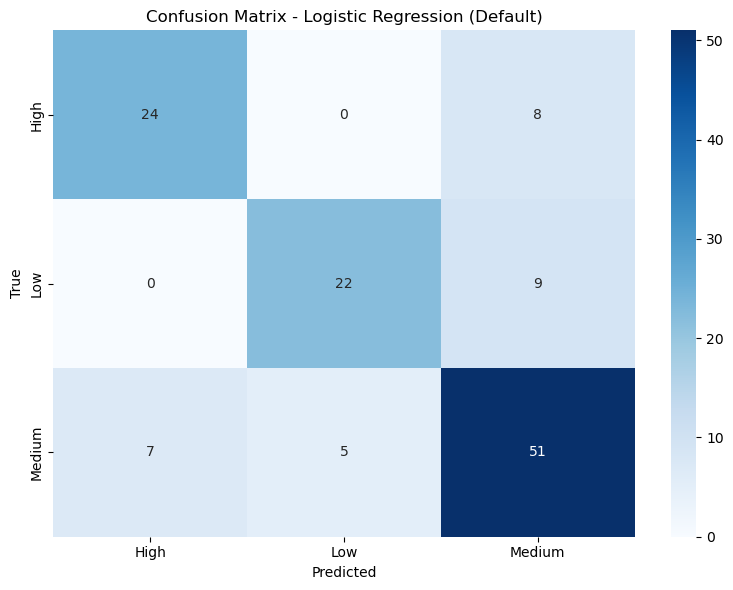

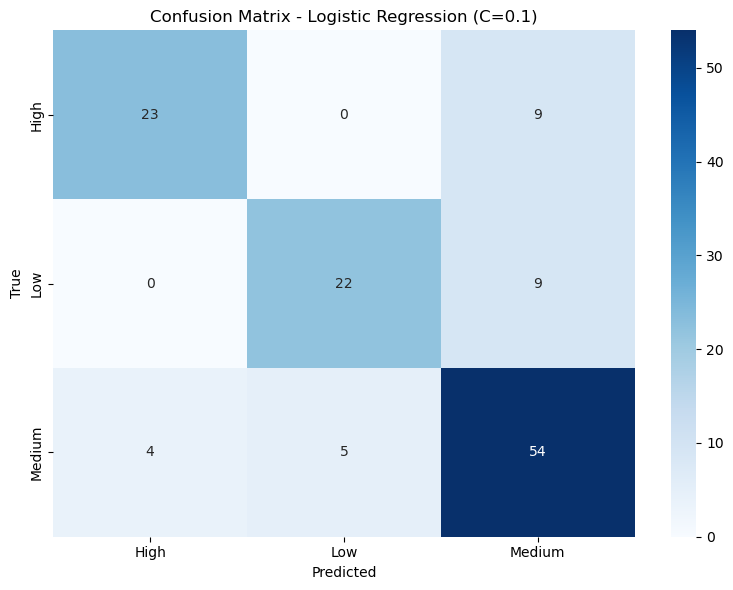

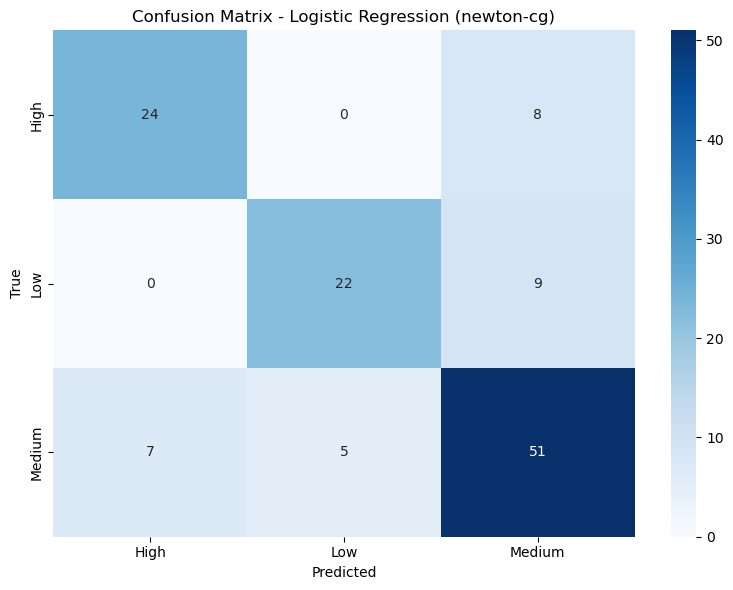

In [107]:
# Experiment 1: Default parameters
print("\n===== LOGISTIC REGRESSION =====")
print("\nExperiment 1: Default parameters")
log_reg_default = LogisticRegression(random_state=42, max_iter=1000)
log_default_train_acc, log_default_test_acc = evaluate_model(
    log_reg_default, X_train_scaled, y_train, X_test_scaled, y_test, "Logistic Regression (Default)"
)

# Experiment 2: Increase regularization (C=0.1)
print("\nExperiment 2: Increased regularization (C=0.1)")
log_reg_reg = LogisticRegression(C=0.1, random_state=42, max_iter=1000)
log_reg_train_acc, log_reg_test_acc = evaluate_model(
    log_reg_reg, X_train_scaled, y_train, X_test_scaled, y_test, "Logistic Regression (C=0.1)"
)

# Experiment 3: Different solver
print("\nExperiment 3: Different solver (newton-cg)")
log_reg_solver = LogisticRegression(solver='newton-cg', random_state=42, max_iter=1000)
log_solver_train_acc, log_solver_test_acc = evaluate_model(
    log_reg_solver, X_train_scaled, y_train, X_test_scaled, y_test, "Logistic Regression (newton-cg)"
)

In [108]:
## ================= K-Nearest Neighbors =================


===== K-NEAREST NEIGHBORS =====

Experiment 1: Depngfault KNN (k=5)

KNN (k=5) Results:
Training Accuracy: 0.7619
Testing Accuracy: 0.6984

Classification Report (Test Set):
              precision    recall  f1-score   support

        High       0.62      0.62      0.62        32
         Low       0.78      0.68      0.72        31
      Medium       0.70      0.75      0.72        63

    accuracy                           0.70       126
   macro avg       0.70      0.68      0.69       126
weighted avg       0.70      0.70      0.70       126


Experiment 2: KNN with k=3

KNN (k=3) Results:
Training Accuracy: 0.8197
Testing Accuracy: 0.6825

Classification Report (Test Set):
              precision    recall  f1-score   support

        High       0.58      0.78      0.67        32
         Low       0.76      0.61      0.68        31
      Medium       0.72      0.67      0.69        63

    accuracy                           0.68       126
   macro avg       0.69      0.69     

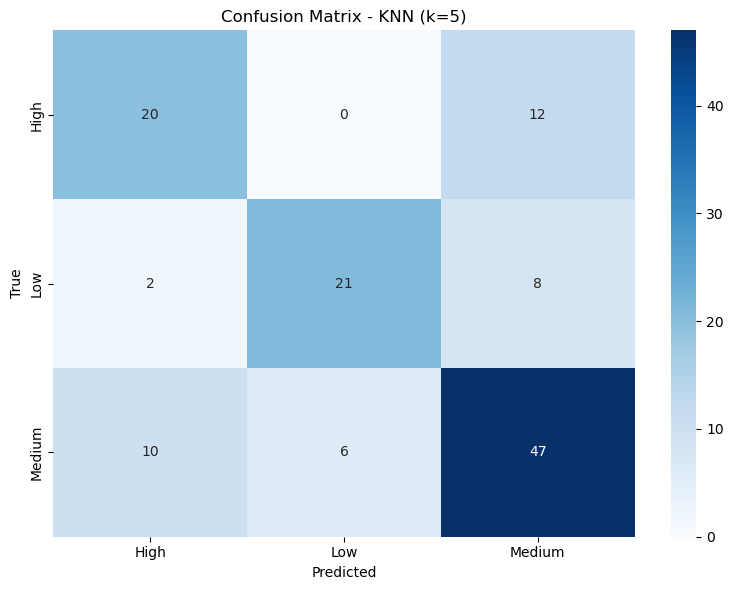

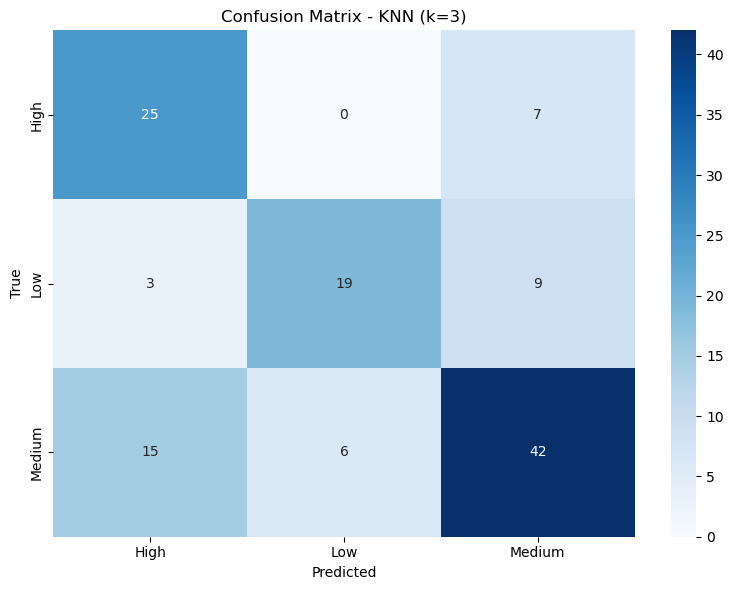

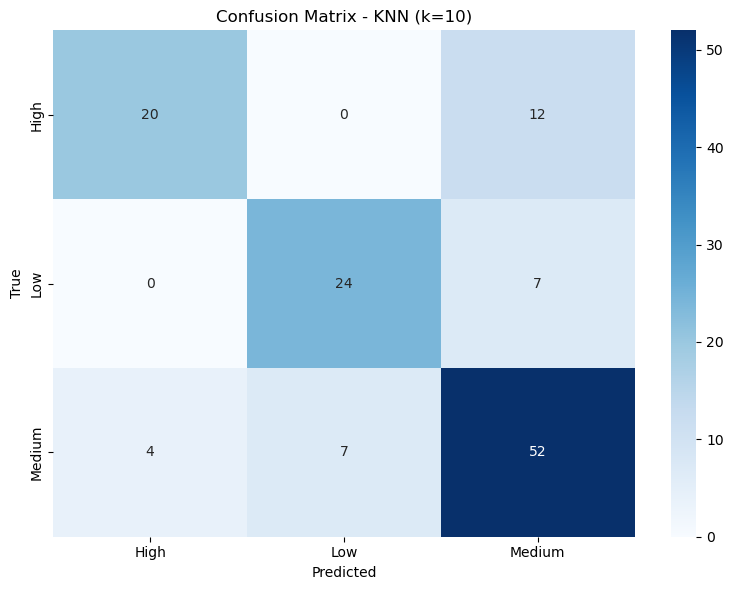

In [109]:
print("\n===== K-NEAREST NEIGHBORS =====")

# Experiment 1: Default KNN (k=5)
print("\nExperiment 1: Depngfault KNN (k=5)")
knn_default = KNeighborsClassifier()
knn_default_train_acc, knn_default_test_acc = evaluate_model(
    knn_default, X_train_scaled, y_train, X_test_scaled, y_test, "KNN (k=5)"
)

# Experiment 2: KNN with k=3
print("\nExperiment 2: KNN with k=3")
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3_train_acc, knn_3_test_acc = evaluate_model(
    knn_3, X_train_scaled, y_train, X_test_scaled, y_test, "KNN (k=3)"
)

# Experiment 3: KNN with k=10
print("\nExperiment 3: KNN with k=10")
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_10_train_acc, knn_10_test_acc = evaluate_model(
    knn_10, X_train_scaled, y_train, X_test_scaled, y_test, "KNN (k=10)"
)

In [110]:
## Compare all models

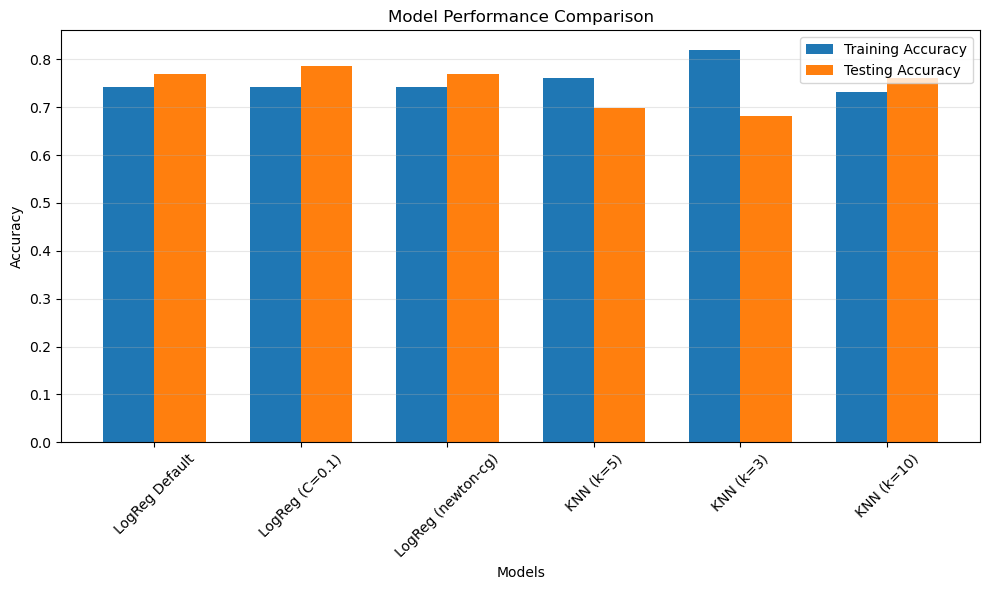

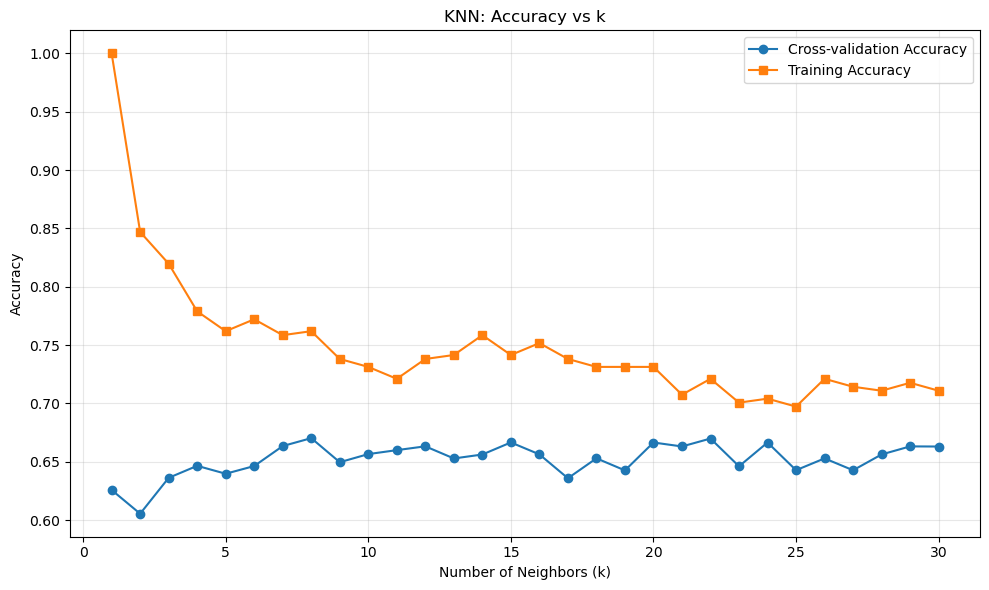

In [111]:
models = ['LogReg Default', 'LogReg (C=0.1)', 'LogReg (newton-cg)', 'KNN (k=5)', 'KNN (k=3)', 'KNN (k=10)']
train_accs = [log_default_train_acc, log_reg_train_acc, log_solver_train_acc, knn_default_train_acc, knn_3_train_acc, knn_10_train_acc]
test_accs = [log_default_test_acc, log_reg_test_acc, log_solver_test_acc, knn_default_test_acc, knn_3_test_acc, knn_10_test_acc]

plt.figure(figsize=(10, 6))
x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, train_accs, width, label='Training Accuracy')
plt.bar(x + width/2, test_accs, width, label='Testing Accuracy')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.xticks(x, models, rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.savefig('model_comparison.png')

# Find the best number of neighbors for KNN
k_range = range(1, 31)
k_scores = []
k_train_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Cross-validation scores
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
    
    # Training scores
    knn.fit(X_train_scaled, y_train)
    k_train_scores.append(accuracy_score(y_train, knn.predict(X_train_scaled)))

plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, 'o-', label='Cross-validation Accuracy')
plt.plot(k_range, k_train_scores, 's-', label='Training Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN: Accuracy vs k')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('knn_k_selection.png')

In [112]:
# Find the best regularization parameter for Logistic Regression

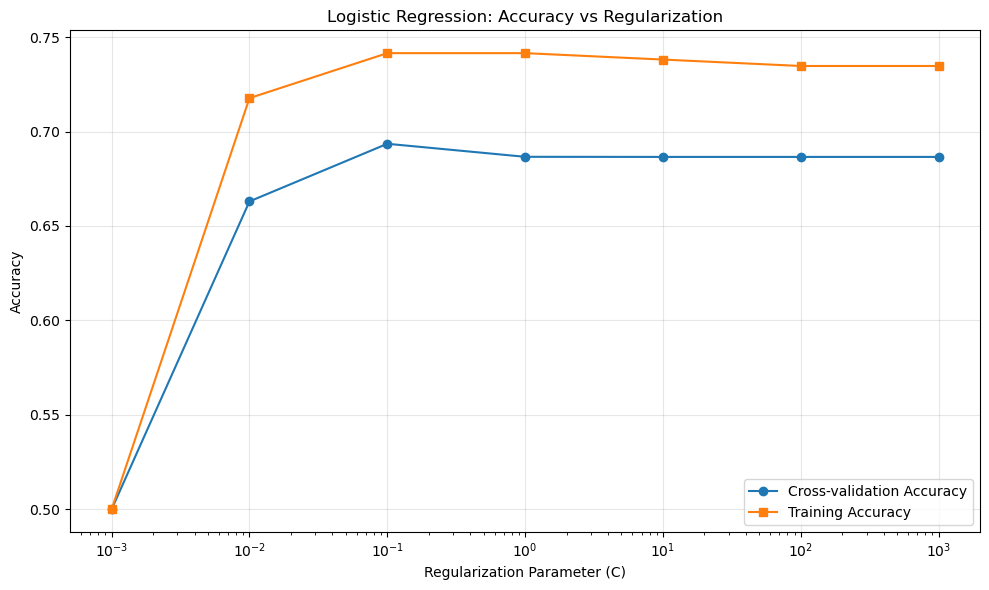

In [113]:
C_range = np.logspace(-3, 3, 7)
C_scores = []
C_train_scores = []

for C in C_range:
    log_reg = LogisticRegression(C=C, random_state=42, max_iter=1000)
    # Cross-validation scores
    scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=5, scoring='accuracy')
    C_scores.append(scores.mean())
    
    # Training scores
    log_reg.fit(X_train_scaled, y_train)
    C_train_scores.append(accuracy_score(y_train, log_reg.predict(X_train_scaled)))

plt.figure(figsize=(10, 6))
plt.semilogx(C_range, C_scores, 'o-', label='Cross-validation Accuracy')
plt.semilogx(C_range, C_train_scores, 's-', label='Training Accuracy')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Accuracy')
plt.title('Logistic Regression: Accuracy vs Regularization')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('logreg_C_selection.png')

In [114]:
## Identify any signs of overfitting or underfitting

In [115]:
print("\n===== CHECKING FOR OVERFITTING/UNDERFITTING =====")
for name, train_acc, test_acc in zip(models, train_accs, test_accs):
    diff = train_acc - test_acc
    print(f"{name}: Train={train_acc:.4f}, Test={test_acc:.4f}, Difference={diff:.4f}")
    if diff > 0.1:
        print("  - Possible overfitting (Train acc > Test acc by >10%)")
    elif diff < -0.05:
        print("  - Possible underfitting (Test acc > Train acc by >5%)")
    else:
        print("  - Good fit (Train and Test acc are close)")

print("\n===== FEATURE IMPORTANCE (LOGISTIC REGRESSION) =====")
# Get feature importance from Logistic Regression
log_reg_default = LogisticRegression(random_state=42, max_iter=1000)
log_reg_default.fit(X_train_scaled, y_train)

# For multiclass, we get coefficients for each class
feature_importance = pd.DataFrame(
    log_reg_default.coef_,
    columns=features,
    index=log_reg_default.classes_
)

print("Feature coefficients by class:")
print(feature_importance)


===== CHECKING FOR OVERFITTING/UNDERFITTING =====
LogReg Default: Train=0.7415, Test=0.7698, Difference=-0.0283
  - Good fit (Train and Test acc are close)
LogReg (C=0.1): Train=0.7415, Test=0.7857, Difference=-0.0442
  - Good fit (Train and Test acc are close)
LogReg (newton-cg): Train=0.7415, Test=0.7698, Difference=-0.0283
  - Good fit (Train and Test acc are close)
KNN (k=5): Train=0.7619, Test=0.6984, Difference=0.0635
  - Good fit (Train and Test acc are close)
KNN (k=3): Train=0.8197, Test=0.6825, Difference=0.1372
  - Possible overfitting (Train acc > Test acc by >10%)
KNN (k=10): Train=0.7313, Test=0.7619, Difference=-0.0306
  - Good fit (Train and Test acc are close)

===== FEATURE IMPORTANCE (LOGISTIC REGRESSION) =====
Feature coefficients by class:
        students  calworks     lunch    income   english  \
High    0.095937 -0.560229 -0.377165  0.737931 -1.078107   
Low     0.017205  0.281993  0.990779 -0.585721  0.498666   
Medium -0.113142  0.278236 -0.613614 -0.152210  

In [ ]:
# inside folder Part2_plots exist all plots please check it